# Text Classification of StackOverflow using  Embeddings Centroids Vectors

In [1]:
import sys
import os
from os import pardir, getcwd
from os.path import join, abspath
PARENT_DIRECTORY = abspath(join(getcwd(), pardir))
sys.path.insert(0, PARENT_DIRECTORY)

import warnings
import sklearn.exceptions
import talos as ta
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

from definitions import  TALOS_DIR
from app.preprocessing import load_dataset, load_embeddings, preprocess_data
from app.models import load_model, find_best_model_over_scan_logs


Using TensorFlow backend.


## Preprocessing for the loaded Dataset
1. Format into *lowercase*
2. Remove some of the *punctuation* characters
3. Remove *Numbers*
4. Remove *stopwords*
5. Remove *links*

In [2]:
data = load_dataset(load_from_pickle=True, input_ins='as_centroids')
Classes = list(data['tags'].value_counts().index)
Nclasses = len(Classes)
print(data['tags'].value_counts())

sql              2000
ruby-on-rails    2000
android          2000
angularjs        2000
asp.net          2000
c                2000
c#               2000
c++              2000
css              2000
html             2000
ios              2000
iphone           2000
java             2000
javascript       2000
jquery           2000
mysql            2000
objective-c      2000
php              2000
python           2000
.net             2000
Name: tags, dtype: int64


## MLP classifier in Keras using not standardized **embeddings-centroids** features

 ### Hyper parameter tuning for the  model

In [3]:
# 70% Train & 30% Test
# 70% Train-Dev % 30* Train-Dev 
embeddings = load_embeddings(data, 'post', minimized=False)
model_data_ftc = preprocess_data(data, 'tags', 'post',
                                 input_ins='as_centroids',
                                 cv_split_full=0.2,
                                 cv_split_dev=0.125,
                                 embeddings=embeddings)


In [11]:
TALOS_FTC_LOG_FILENAME = 'talos_ftc_log'
talos_ftc_log_pathname = os.path.join(TALOS_DIR, TALOS_FTC_LOG_FILENAME)


###### Production configuration
ftc_model_config = {
    'visualize_process': [False],
    'first_neuron': [256, 512],  # First Layer
    'activation': ['relu', 'tanh'],
    'dropout': [0.2, 0.6],
    'number_of_hidden_layers': [0, 1, 2],
    'shapes':['funnel'],
    'epochs': [20, 30],
    'early_stopping':[True],
    'early_stopping_config__monitor': ['val_f1'],
    'early_stopping_config__min_delta': [0],
    'early_stopping_config__patience': [5],
    'early_stopping_config__mode': ['max'],
    'batch_size': [32, 64],
    'model_type': ['keras_embeddings_centroids_model'],
}

history_model_ftc = ta.Scan(model_data_ftc['x_train'],
                            model_data_ftc['y_train'],
                            x_val=model_data_ftc['x_train_dev'],
                            y_val=model_data_ftc['y_train_dev'],
                            model=load_model,
                            params=ftc_model_config,
                            grid_downsample=0.1,
                            print_params=True,
                            last_epoch_value=True,
                            seed=(123),
                            dataset_name=talos_ftc_log_pathname
                            )








  0%|          | 0/9 [00:00<?, ?it/s]

{'visualize_process': False, 'first_neuron': 512, 'activation': 'relu', 'dropout': 0.6, 'number_of_hidden_layers': 0, 'shapes': 'funnel', 'epochs': 30, 'early_stopping': True, 'early_stopping_config__monitor': 'val_f1', 'early_stopping_config__min_delta': 0, 'early_stopping_config__patience': 5, 'early_stopping_config__mode': 'max', 'batch_size': 64, 'model_type': 'keras_embeddings_centroids_model'}








 11%|█         | 1/9 [00:46<06:14, 46.78s/it]

{'visualize_process': False, 'first_neuron': 256, 'activation': 'relu', 'dropout': 0.6, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 20, 'early_stopping': True, 'early_stopping_config__monitor': 'val_f1', 'early_stopping_config__min_delta': 0, 'early_stopping_config__patience': 5, 'early_stopping_config__mode': 'max', 'batch_size': 64, 'model_type': 'keras_embeddings_centroids_model'}








 22%|██▏       | 2/9 [01:14<04:47, 41.09s/it]

{'visualize_process': False, 'first_neuron': 256, 'activation': 'relu', 'dropout': 0.2, 'number_of_hidden_layers': 1, 'shapes': 'funnel', 'epochs': 20, 'early_stopping': True, 'early_stopping_config__monitor': 'val_f1', 'early_stopping_config__min_delta': 0, 'early_stopping_config__patience': 5, 'early_stopping_config__mode': 'max', 'batch_size': 32, 'model_type': 'keras_embeddings_centroids_model'}








 33%|███▎      | 3/9 [01:56<04:07, 41.22s/it]

{'visualize_process': False, 'first_neuron': 256, 'activation': 'relu', 'dropout': 0.6, 'number_of_hidden_layers': 0, 'shapes': 'funnel', 'epochs': 30, 'early_stopping': True, 'early_stopping_config__monitor': 'val_f1', 'early_stopping_config__min_delta': 0, 'early_stopping_config__patience': 5, 'early_stopping_config__mode': 'max', 'batch_size': 32, 'model_type': 'keras_embeddings_centroids_model'}








 44%|████▍     | 4/9 [02:47<03:41, 44.34s/it]

{'visualize_process': False, 'first_neuron': 512, 'activation': 'tanh', 'dropout': 0.2, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 20, 'early_stopping': True, 'early_stopping_config__monitor': 'val_f1', 'early_stopping_config__min_delta': 0, 'early_stopping_config__patience': 5, 'early_stopping_config__mode': 'max', 'batch_size': 32, 'model_type': 'keras_embeddings_centroids_model'}








 56%|█████▌    | 5/9 [04:06<03:38, 54.55s/it]

{'visualize_process': False, 'first_neuron': 256, 'activation': 'relu', 'dropout': 0.2, 'number_of_hidden_layers': 1, 'shapes': 'funnel', 'epochs': 30, 'early_stopping': True, 'early_stopping_config__monitor': 'val_f1', 'early_stopping_config__min_delta': 0, 'early_stopping_config__patience': 5, 'early_stopping_config__mode': 'max', 'batch_size': 64, 'model_type': 'keras_embeddings_centroids_model'}








 67%|██████▋   | 6/9 [04:47<02:32, 50.68s/it]

{'visualize_process': False, 'first_neuron': 256, 'activation': 'relu', 'dropout': 0.6, 'number_of_hidden_layers': 1, 'shapes': 'funnel', 'epochs': 20, 'early_stopping': True, 'early_stopping_config__monitor': 'val_f1', 'early_stopping_config__min_delta': 0, 'early_stopping_config__patience': 5, 'early_stopping_config__mode': 'max', 'batch_size': 64, 'model_type': 'keras_embeddings_centroids_model'}








 78%|███████▊  | 7/9 [05:16<01:28, 44.07s/it]

{'visualize_process': False, 'first_neuron': 512, 'activation': 'relu', 'dropout': 0.2, 'number_of_hidden_layers': 1, 'shapes': 'funnel', 'epochs': 30, 'early_stopping': True, 'early_stopping_config__monitor': 'val_f1', 'early_stopping_config__min_delta': 0, 'early_stopping_config__patience': 5, 'early_stopping_config__mode': 'max', 'batch_size': 32, 'model_type': 'keras_embeddings_centroids_model'}








 89%|████████▉ | 8/9 [06:54<01:00, 60.33s/it]

{'visualize_process': False, 'first_neuron': 256, 'activation': 'tanh', 'dropout': 0.6, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 30, 'early_stopping': True, 'early_stopping_config__monitor': 'val_f1', 'early_stopping_config__min_delta': 0, 'early_stopping_config__patience': 5, 'early_stopping_config__mode': 'max', 'batch_size': 64, 'model_type': 'keras_embeddings_centroids_model'}








100%|██████████| 9/9 [07:40<00:00, 55.87s/it]

    Finds the best model configuration set for the TF-IDF, after the Talos Scanning.

In [12]:
report_ftc = ta.Reporting(history_model_ftc)
best_model_idx = report_ftc.data['val_f1'].idxmax()
best_model_params = report_ftc.data.loc[best_model_idx].to_dict()
best_model_params

{'round_epochs': 30,
 'val_loss': 0.8952985677719116,
 'val_f1': 0.7085679340362548,
 'val_categorical_accuracy': 0.7105,
 'loss': 0.8240707894052778,
 'f1': 0.7140783961159842,
 'categorical_accuracy': 0.7241071428571428,
 'visualize_process': 'False',
 'first_neuron': 256,
 'activation': 'relu',
 'dropout': 0.2,
 'number_of_hidden_layers': 1,
 'shapes': 'funnel',
 'epochs': 30,
 'early_stopping': 'True',
 'early_stopping_config__monitor': 'val_f1',
 'early_stopping_config__min_delta': 0,
 'early_stopping_config__patience': 5,
 'early_stopping_config__mode': 'max',
 'batch_size': 64,
 'model_type': 'keras_embeddings_centroids_model'}

    Train return a TF-IDF Model with the the best configuration set.

In [16]:
# Train and Load the best model of given the tuned featured model
model_ftc_history, model_ftc = load_model(model_data_ftc['x_train'],
                                          model_data_ftc['y_train'],
                                          model_data_ftc['x_train_dev'],
                                          model_data_ftc['y_train_dev'],
                                          best_model_params)

### Visualize Model History Scores

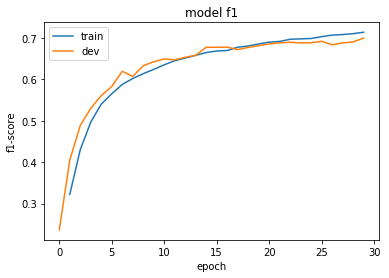

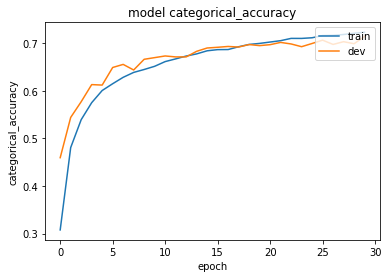

In [27]:
from app.visualization import plot_history_metrics
import matplotlib.pylab as plt

%matplotlib inline
plot_history_metrics(history_obj=model_ftc_history)

### Evaluate performance model

Evaluates the performance of the best trained model in the **test** dataset. 

In [18]:
scoref_ftc = model_ftc.evaluate(model_data_ftc['x_test'],
                               model_data_ftc['y_test'],
                               batch_size=best_model_params['batch_size'],
                               verbose=1)

print('\nTest f1: %.4f' % (scoref_ftc[1]))
print('\nTest categorical accuracy: %.4f'% (scoref_ftc[2]))

8000/8000 [==============================] - 0s 18us/step

Test f1: 0.7034

Test categorical accuracy: 0.7086


### Visualize Prediction Perfomance  model

--------------------------------------------------------------------------------
Accuracy Score: 70.86%
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0      0.685     0.593     0.635       400
           1      0.828     0.720     0.770       400
           2      0.790     0.780     0.785       400
           3      0.744     0.632     0.684       400
           4      0.806     0.830     0.818       400
           5      0.534     0.625     0.576       400
           6      0.726     0.708     0.716       400
           7      0.780     0.843     0.810       400
           8      0.572     0.713     0.635       400
           9      0.537     0.595     0.565       400
          10      0.546     0.500     0.522       400
          11      0.724     0.662     0.692       400
       

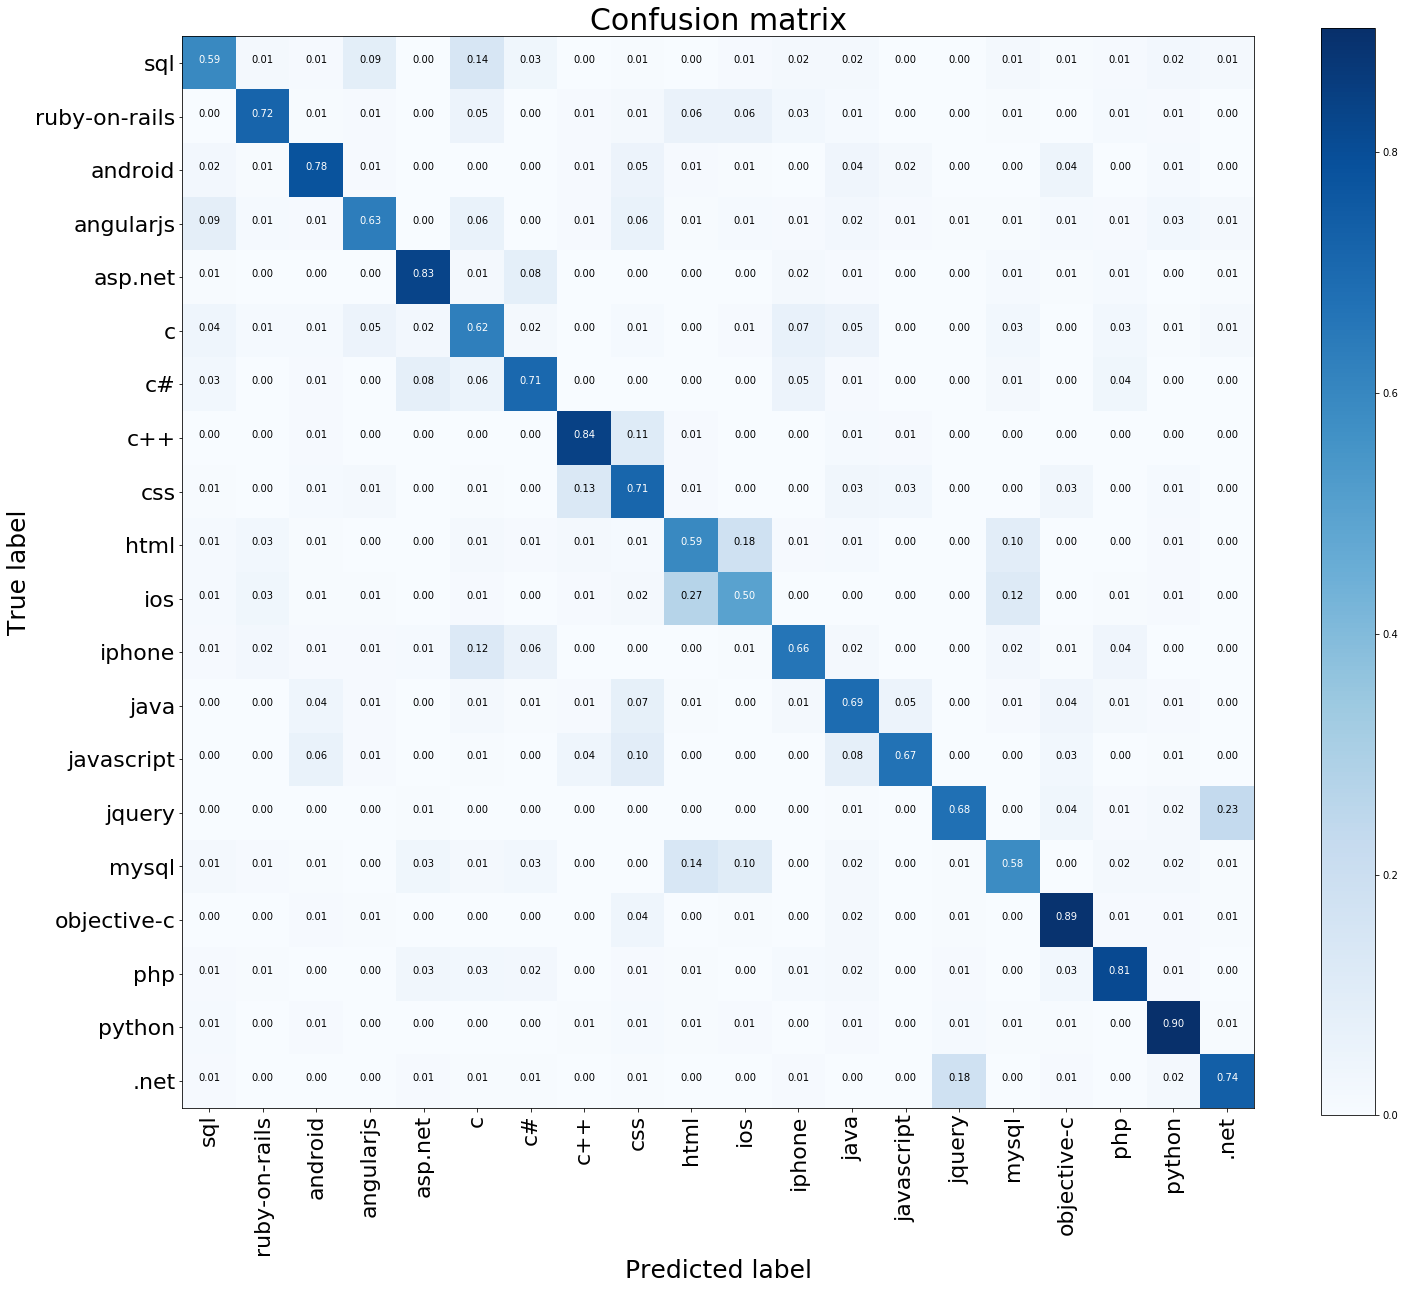

In [19]:
import numpy as np
from app.visualization import (plot_prediction_metrics,
                               create_clf_report,
                               plot_roc_curve,
                               plot_precision_recall_curve,
                               plot_confusion_matrix)
import matplotlib.pylab as plt

prediction_val_ftc = model_ftc.predict(model_data_ftc['x_test'], batch_size=best_model_params['batch_size'])

# returns each entry result to the classification with the relevant probabilities
y_pred_processed_ftc = np.array([np.argmax(val) for val in prediction_val_ftc])
y_true_processed_ftc = np.array([np.argmax(val) for val in model_data_ftc['y_test']])

# If you want to see the OneVSAll ROC Curves of each class uncomment the below line
# plot_roc_curve(model_data_ftc['y_test'], prediction_val_ftc, Classes, 1)

# If you want to see the OneVSAll Precission Recall Curves of each class, comment out the below line
# plot_precision_recall_curve(model_data_ftc['y_test'], prediction_val_ftc, Classes , 1)

# If you want to get the Classification Report, comment out the below line
create_clf_report(y_true_processed_ftc, y_pred_processed_ftc, Classes)

# If you want to get the confusion matrix,comment out the below line
plot_confusion_matrix(y_true_processed_ftc, y_pred_processed_ftc, Classes)

## MLP classifier in Keras using standardized **embeddings-centroids** features

In [20]:
TALOS_SDR_FTC_LOG_FILENAME = 'talos_sdr_ftc_log'
talos_sdr_ftc_log_pathname = os.path.join(TALOS_DIR, TALOS_SDR_FTC_LOG_FILENAME)
from app.models import load_model
    
# Loads the dataset using centroids embeddings but now every word vector has been stardirdized.
model_data_sdr_ftc = preprocess_data(data, 'tags', 'post',
                                     input_ins='as_centroids',
                                     cv_split_full=0.2,
                                     cv_split_dev=0.125,
                                     standardize=True,
                                     embeddings=embeddings)

In [21]:
ftc_sdr_model_config = ftc_model_config.copy()
ftc_sdr_model_config.update({
    'model_type': ['keras_sdr_embeddings_centroids_model']
})



history_model_sdr_ftc = ta.Scan(model_data_sdr_ftc['x_train'],
                                model_data_sdr_ftc['y_train'],
                                x_val=model_data_sdr_ftc['x_train_dev'],
                                y_val=model_data_sdr_ftc['y_train_dev'],
                                model=load_model,
                                params=ftc_sdr_model_config,
                                last_epoch_value=True,
                                grid_downsample=0.1,
                                print_params=True,
                                seed=123,
                                dataset_name=ftc_sdr_model_config
                                )











  0%|          | 0/9 [00:00<?, ?it/s]

{'visualize_process': False, 'first_neuron': 512, 'activation': 'tanh', 'dropout': 0.2, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 20, 'early_stopping': True, 'early_stopping_config__monitor': 'val_f1', 'early_stopping_config__min_delta': 0, 'early_stopping_config__patience': 5, 'early_stopping_config__mode': 'max', 'batch_size': 64, 'model_type': 'keras_sdr_embeddings_centroids_model'}












 11%|█         | 1/9 [00:47<06:20, 47.50s/it]

{'visualize_process': False, 'first_neuron': 256, 'activation': 'relu', 'dropout': 0.2, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 30, 'early_stopping': True, 'early_stopping_config__monitor': 'val_f1', 'early_stopping_config__min_delta': 0, 'early_stopping_config__patience': 5, 'early_stopping_config__mode': 'max', 'batch_size': 32, 'model_type': 'keras_sdr_embeddings_centroids_model'}












 22%|██▏       | 2/9 [02:00<06:25, 55.05s/it]

{'visualize_process': False, 'first_neuron': 256, 'activation': 'tanh', 'dropout': 0.6, 'number_of_hidden_layers': 0, 'shapes': 'funnel', 'epochs': 20, 'early_stopping': True, 'early_stopping_config__monitor': 'val_f1', 'early_stopping_config__min_delta': 0, 'early_stopping_config__patience': 5, 'early_stopping_config__mode': 'max', 'batch_size': 64, 'model_type': 'keras_sdr_embeddings_centroids_model'}












 33%|███▎      | 3/9 [02:21<04:28, 44.82s/it]

{'visualize_process': False, 'first_neuron': 512, 'activation': 'relu', 'dropout': 0.2, 'number_of_hidden_layers': 1, 'shapes': 'funnel', 'epochs': 30, 'early_stopping': True, 'early_stopping_config__monitor': 'val_f1', 'early_stopping_config__min_delta': 0, 'early_stopping_config__patience': 5, 'early_stopping_config__mode': 'max', 'batch_size': 64, 'model_type': 'keras_sdr_embeddings_centroids_model'}












 44%|████▍     | 4/9 [03:03<03:40, 44.14s/it]

{'visualize_process': False, 'first_neuron': 512, 'activation': 'relu', 'dropout': 0.2, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 30, 'early_stopping': True, 'early_stopping_config__monitor': 'val_f1', 'early_stopping_config__min_delta': 0, 'early_stopping_config__patience': 5, 'early_stopping_config__mode': 'max', 'batch_size': 32, 'model_type': 'keras_sdr_embeddings_centroids_model'}












 56%|█████▌    | 5/9 [04:24<03:40, 55.01s/it]

{'visualize_process': False, 'first_neuron': 256, 'activation': 'tanh', 'dropout': 0.6, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 30, 'early_stopping': True, 'early_stopping_config__monitor': 'val_f1', 'early_stopping_config__min_delta': 0, 'early_stopping_config__patience': 5, 'early_stopping_config__mode': 'max', 'batch_size': 64, 'model_type': 'keras_sdr_embeddings_centroids_model'}












 67%|██████▋   | 6/9 [05:07<02:34, 51.42s/it]

{'visualize_process': False, 'first_neuron': 256, 'activation': 'relu', 'dropout': 0.6, 'number_of_hidden_layers': 2, 'shapes': 'funnel', 'epochs': 30, 'early_stopping': True, 'early_stopping_config__monitor': 'val_f1', 'early_stopping_config__min_delta': 0, 'early_stopping_config__patience': 5, 'early_stopping_config__mode': 'max', 'batch_size': 64, 'model_type': 'keras_sdr_embeddings_centroids_model'}












 78%|███████▊  | 7/9 [05:53<01:39, 49.91s/it]

{'visualize_process': False, 'first_neuron': 512, 'activation': 'tanh', 'dropout': 0.6, 'number_of_hidden_layers': 0, 'shapes': 'funnel', 'epochs': 20, 'early_stopping': True, 'early_stopping_config__monitor': 'val_f1', 'early_stopping_config__min_delta': 0, 'early_stopping_config__patience': 5, 'early_stopping_config__mode': 'max', 'batch_size': 64, 'model_type': 'keras_sdr_embeddings_centroids_model'}












 89%|████████▉ | 8/9 [06:24<00:44, 44.22s/it]

{'visualize_process': False, 'first_neuron': 512, 'activation': 'tanh', 'dropout': 0.2, 'number_of_hidden_layers': 1, 'shapes': 'funnel', 'epochs': 20, 'early_stopping': True, 'early_stopping_config__monitor': 'val_f1', 'early_stopping_config__min_delta': 0, 'early_stopping_config__patience': 5, 'early_stopping_config__mode': 'max', 'batch_size': 64, 'model_type': 'keras_sdr_embeddings_centroids_model'}












100%|██████████| 9/9 [07:06<00:00, 43.49s/it]

    Finds the best model for the Standardized FastText Embeddings Centroids.

In [22]:
report_sdr_ftc = ta.Reporting(history_model_sdr_ftc)

#get best model configuration
best_model_sdr_ftc_idx = report_sdr_ftc.data['val_f1'].idxmax()
best_model_params_sdr_ftc = report_sdr_ftc.data.loc[best_model_sdr_ftc_idx].to_dict()
best_model_params_sdr_ftc

{'round_epochs': 20,
 'val_loss': 0.9192654552459717,
 'val_f1': 0.7112077794075012,
 'val_categorical_accuracy': 0.71025,
 'loss': 0.7153114741189139,
 'f1': 0.758557110786438,
 'categorical_accuracy': 0.7596428571428572,
 'visualize_process': 'False',
 'first_neuron': 512,
 'activation': 'tanh',
 'dropout': 0.2,
 'number_of_hidden_layers': 1,
 'shapes': 'funnel',
 'epochs': 20,
 'early_stopping': 'True',
 'early_stopping_config__monitor': 'val_f1',
 'early_stopping_config__min_delta': 0,
 'early_stopping_config__patience': 5,
 'early_stopping_config__mode': 'max',
 'batch_size': 64,
 'model_type': 'keras_sdr_embeddings_centroids_model'}

    Trains and fit the MLP Network with the standardized data using the best selected features.

In [23]:
model_sdr_ftc_history, model_sdr_ftc = load_model(model_data_sdr_ftc['x_train'],
                                                  model_data_sdr_ftc['y_train'],
                                                  model_data_sdr_ftc['x_train_dev'],
                                                  model_data_sdr_ftc['y_train_dev'],
                                                  best_model_params_sdr_ftc)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               154112    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                5140      
Total params: 290,580
Trainable params: 290,580
Non-trainable params: 0
_________________________________________________________________
None



Epoch 00001: val_f1 improved from -inf to 0.59060, saving model to keras_sdr_embeddings_centroids_model



Epoch 00002: val_f1 improved from 0.59060 to 0.62141, saving model to keras_sdr_embeddings_centroids_model



Epoch 00003: val_f1 improved from 0.62141 to 0.65091, saving model to keras_sdr_embeddings_centroids_model



Epoch 00004: val_f1 improved from 0.65091 to 0.66328, saving model to keras_sdr_embeddings_centroids_model



Epoch 00005: val_f1 improved from 0.66328 to 0.67503, saving model to keras_sdr_embeddings_centroids_model



Epoch 00006: val_f1 improved from 0.67503 to 0.69149, saving model to keras_sdr_embeddings_centroids_model



Epoch 00007: val_f1 improved from 0.69149 to 0.69637, saving model to keras_sdr_embeddings_centroids_model



Epoch 00008: val_f1 improved from 0.69637 to 0.70013, saving model to keras_sdr_embeddings_centroids_model



Epoch 00009: val_f1 did not improve from 0.70013



Epoch 00010: val_f1 improved from 0.70013 to 0.70728, saving model to keras_sdr_embeddings_centroids_model



Epoch 00011: val_f1 did not improve from 0.70728



Epoch 00012: val_f1 did not improve from 0.70728



Epoch 00013: val_f1 did not improve from 0.70728



Epoch 00014: val_f1 improved from 0.70728 to 0.70753, saving model to keras_sdr_embeddings_centroids_model



Epoch 00015: val_f1 improved from 0.70753 to 0.71314, saving model to keras_sdr_embeddings_centroids_model



Epoch 00016: val_f1 did not improve from 0.71314



Epoch 00017: val_f1 did not improve from 0.71314



Epoch 00018: val_f1 improved from 0.71314 to 0.72164, saving model to keras_sdr_embeddings_centroids_model



Epoch 00019: val_f1 did not improve from 0.72164



Epoch 00020: val_f1 did not improve from 0.72164


 ### Visualize Model History Scores


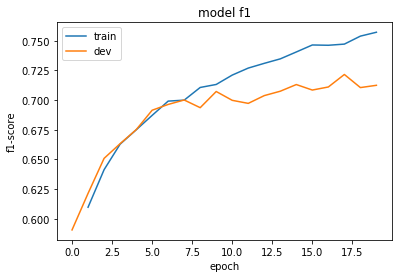

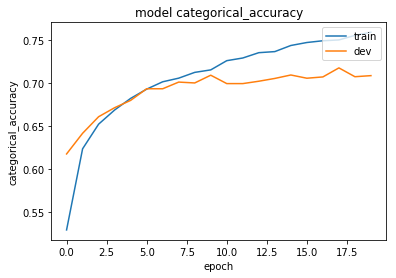

In [24]:
from app.visualization import plot_history_metrics
%matplotlib inline
plot_history_metrics(model_sdr_ftc_history)


### Evaluate performance model

Evaluates the performance of the best trained model in the **test** dataset. 

In [25]:
score_sdr_ftc = model_sdr_ftc.evaluate(model_data_sdr_ftc['x_test'],
                                       model_data_sdr_ftc['y_test'],
                                       batch_size=best_model_params_sdr_ftc['batch_size'],
                                       verbose=1)

print('\nTest f1: %.4f' % (score_sdr_ftc[1]))
print('\nTest categorical accuracy: %.4f'% (score_sdr_ftc[2]))

8000/8000 [==============================] - 0s 18us/step

Test f1: 0.7164

Test categorical accuracy: 0.7110


### Visualize Prediction Perfomance of standardized centroids MLP model

--------------------------------------------------------------------------------
Accuracy Score: 71.10%
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0      0.683     0.588     0.632       400
           1      0.786     0.755     0.770       400
           2      0.791     0.815     0.803       400
           3      0.679     0.698     0.688       400
           4      0.809     0.835     0.822       400
           5      0.611     0.545     0.576       400
           6      0.711     0.713     0.712       400
           7      0.783     0.868     0.823       400
           8      0.703     0.537     0.609       400
           9      0.542     0.495     0.518       400
          10      0.519     0.613     0.562       400
          11      0.680     0.733     0.705       400
       

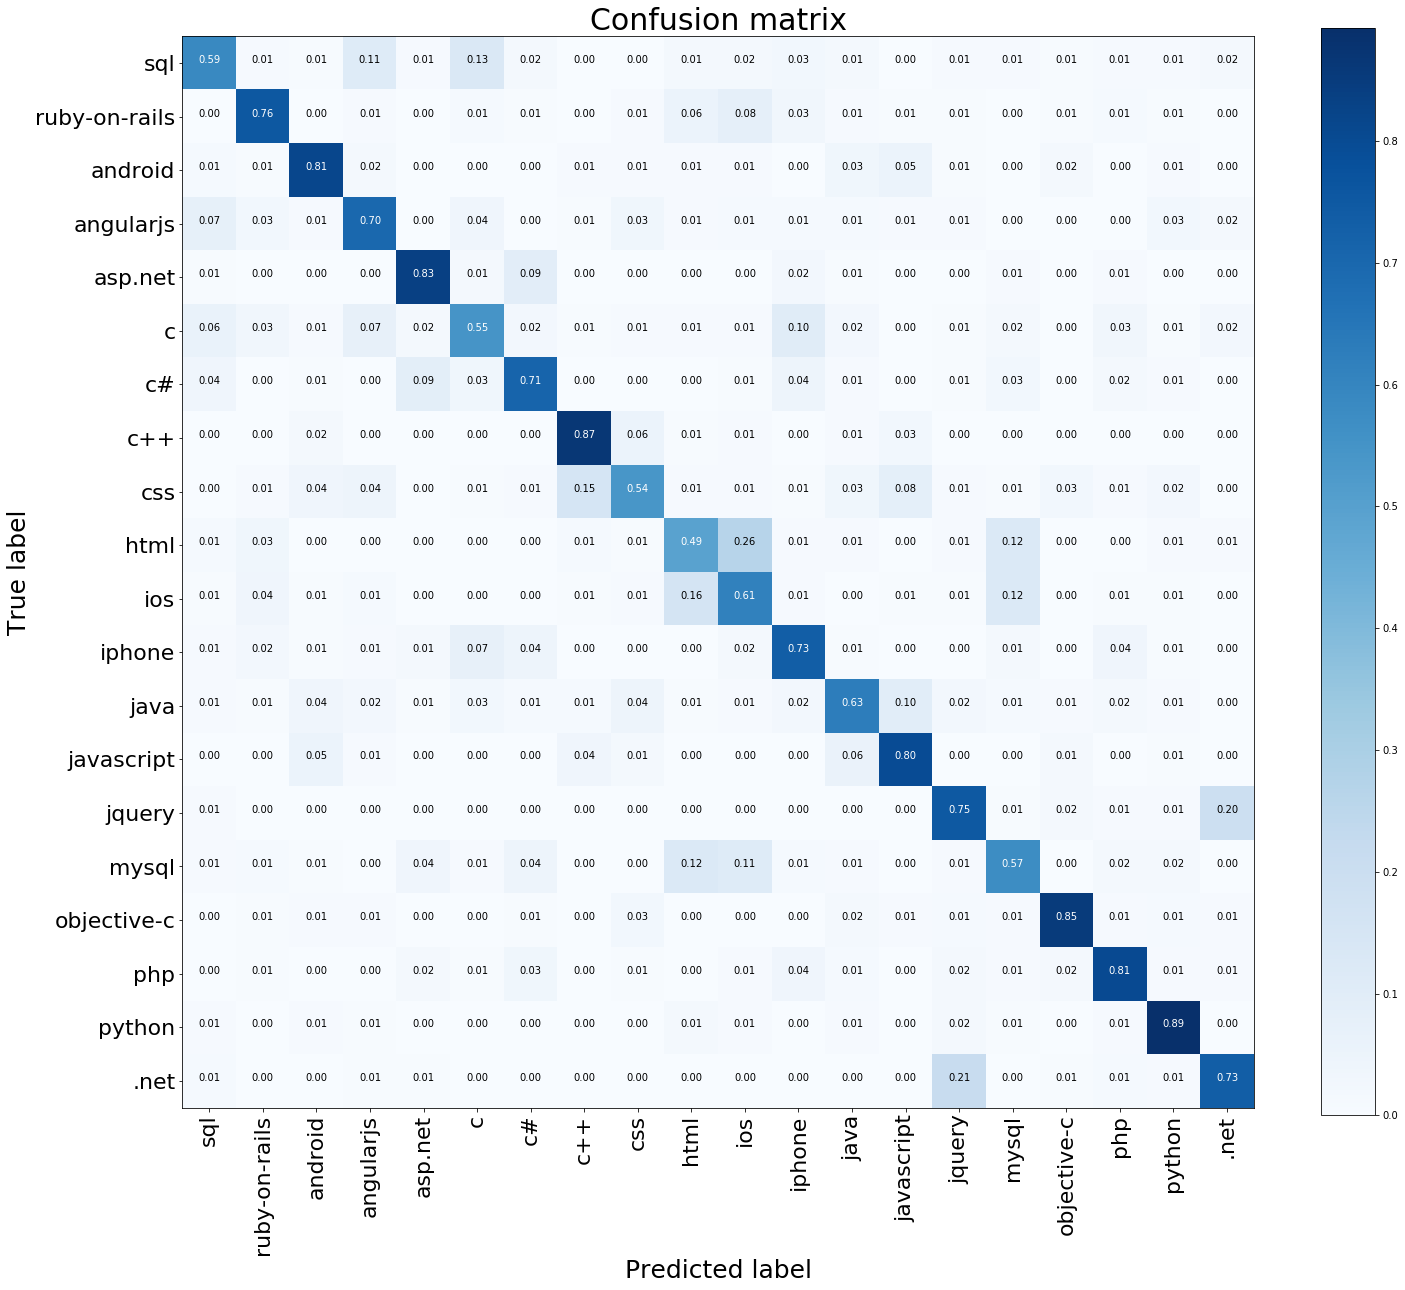

In [26]:
import numpy as np
from app.visualization import (plot_prediction_metrics,
                               create_clf_report,
                               plot_roc_curve,
                               plot_precision_recall_curve)
import matplotlib.pylab as plt

prediction_val_sdr_ftc = model_sdr_ftc.predict(model_data_sdr_ftc['x_test'],
                                               batch_size=best_model_params_sdr_ftc['batch_size'])

# returns each entry result to the classification with the relevant probabilities
y_pred_processed_sdr_ftc = np.array([np.argmax(val) for val in prediction_val_sdr_ftc])
y_true_processed_sdr_ftc = np.array([np.argmax(val) for val in model_data_sdr_ftc['y_test']])

# If you want to get the Classification Report, comment out the below line
create_clf_report(y_true_processed_sdr_ftc, y_pred_processed_sdr_ftc, Classes)

# If you want to get the confusion matrix,comment out the below line
plot_confusion_matrix(y_true_processed_sdr_ftc, y_pred_processed_sdr_ftc, Classes)